## Data Analysis
### Run details:
+ NS_max_iter 10000000 
+ NS_sampling_efficiency 0.15
+ NS_evidence_tolerance 0.8
+ NS_n_live_points 1000 


In [17]:
#Show plots inline, and load main getdist plot module and samples class
from __future__ import print_function
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
from getdist import plots, MCSamples
import getdist, IPython
import pylab as plt
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))
#matplotlib 2 doesn't seem to work well without usetex on
plt.rcParams['text.usetex']=True

import numpy as np 

GetDist Version: 1.1.2, Matplotlib version: 3.3.2


In [85]:
names_k1k  = ['omega_cdm', 'S_8', 'omega_b', 'n_s', 'h', 'Omega_m', 'sigma8']
labels_k1k = ['\omega_{\rm{cdm}}', 'S_{\rm{8}}', '\omega_{\rm{b}}', 'n_{\rm{s}}', 'h', '\Omega_{\rm{m}}', '\sigma8']

names_comp = [ 'Omega_m_geo', 'sigma8_geo', 'S8_geo', 'Omega_m_gro', 'sigma8_gro', 'S8_gro']
labels_comp = [ '\Omega_m^{geo}', '\sigma_8^{geo}', 'S_8^{geo}', '\Omega_m^{gro}', '\sigma_8^{gro}', 'S_8^{gro}']

In [86]:
planck1 = np.loadtxt('/home/zcapjru/Master_Thesis/Thesis_data/PLANCK/Planck_TTTEEE_lowl_lowE/base_plikHM_TTTEEE_lowl_lowE_post_zre6p5_1.txt')
planck2 = np.loadtxt('/home/zcapjru/Master_Thesis/Thesis_data/PLANCK/Planck_TTTEEE_lowl_lowE/base_plikHM_TTTEEE_lowl_lowE_post_zre6p5_2.txt')
planck3 = np.loadtxt('/home/zcapjru/Master_Thesis/Thesis_data/PLANCK/Planck_TTTEEE_lowl_lowE/base_plikHM_TTTEEE_lowl_lowE_post_zre6p5_3.txt')
planck4 = np.loadtxt('/home/zcapjru/Master_Thesis/Thesis_data/PLANCK/Planck_TTTEEE_lowl_lowE/base_plikHM_TTTEEE_lowl_lowE_post_zre6p5_4.txt')

planck_tot = np.concatenate((planck1, planck2, planck3, planck4), axis=0)

In [87]:
planck_params = []
for item in planck_tot:
    planck_params.append([(item[29]/100)*(item[29]/100)*(item[31] - item[2]), item[35], item[2],  item[7], item[29]/100, item[31], item[34]])
planck_params = np.array(planck_params)
planck= MCSamples(samples=planck_params, names = names_k1k, labels = labels_k1k, label= 'Planck 2018',
                    weights=np.transpose(planck_tot)[0],loglikes=np.transpose(planck_tot)[1])

Removed no burn in


In [88]:
def munch_1cosmo(path, names, labels, name):
    chain = np.loadtxt(path)
    cols = np.transpose(chain)
    loglikes = cols[1]
    weights = cols[0]
    param_cols = np.append(cols[2:7], cols[-2:], axis=0)
    param_rows = np.transpose(param_cols)
    samples = MCSamples(samples=param_rows, names=names, labels=labels, label = name,
                        weights=weights, loglikes=loglikes)
    return samples

In [89]:
def munch_2cosmo(path, names, labels, name):
    chain = np.loadtxt(path)
    cols = np.transpose(chain)
    loglikes = cols[1]
    weights =  cols[0]
    param_cols_gro = np.append(cols[2:7], cols[-4:-2], axis=0)
    param_rows_gro = np.transpose(param_cols_gro)
    param_cols_geo = np.append(cols[7:12], cols[-2:], axis=0)
    param_rows_geo = np.transpose(param_cols_geo)
        
    samples_gro = MCSamples(samples=param_rows_gro, names=names, labels=labels, label=name+' gro', 
                        weights=weights, loglikes=loglikes)
    samples_geo = MCSamples(samples=param_rows_geo, names=names, labels=labels, label=name+' geo',
                        weights=weights, loglikes=loglikes)
    
    return samples_gro, samples_geo
    

In [90]:
K1K = munch_1cosmo('K1K_results/K1K_1c/chain_NS__accepted.txt', names_k1k, labels_k1k, 'K1K')

Removed no burn in


In [91]:
K1K_gro, K1K_geo = munch_2cosmo('K1K_results/K1K_bp/chain_NS__accepted.txt', names_k1k, labels_k1k, 'K1K')

Removed no burn in
Removed no burn in


# K1K

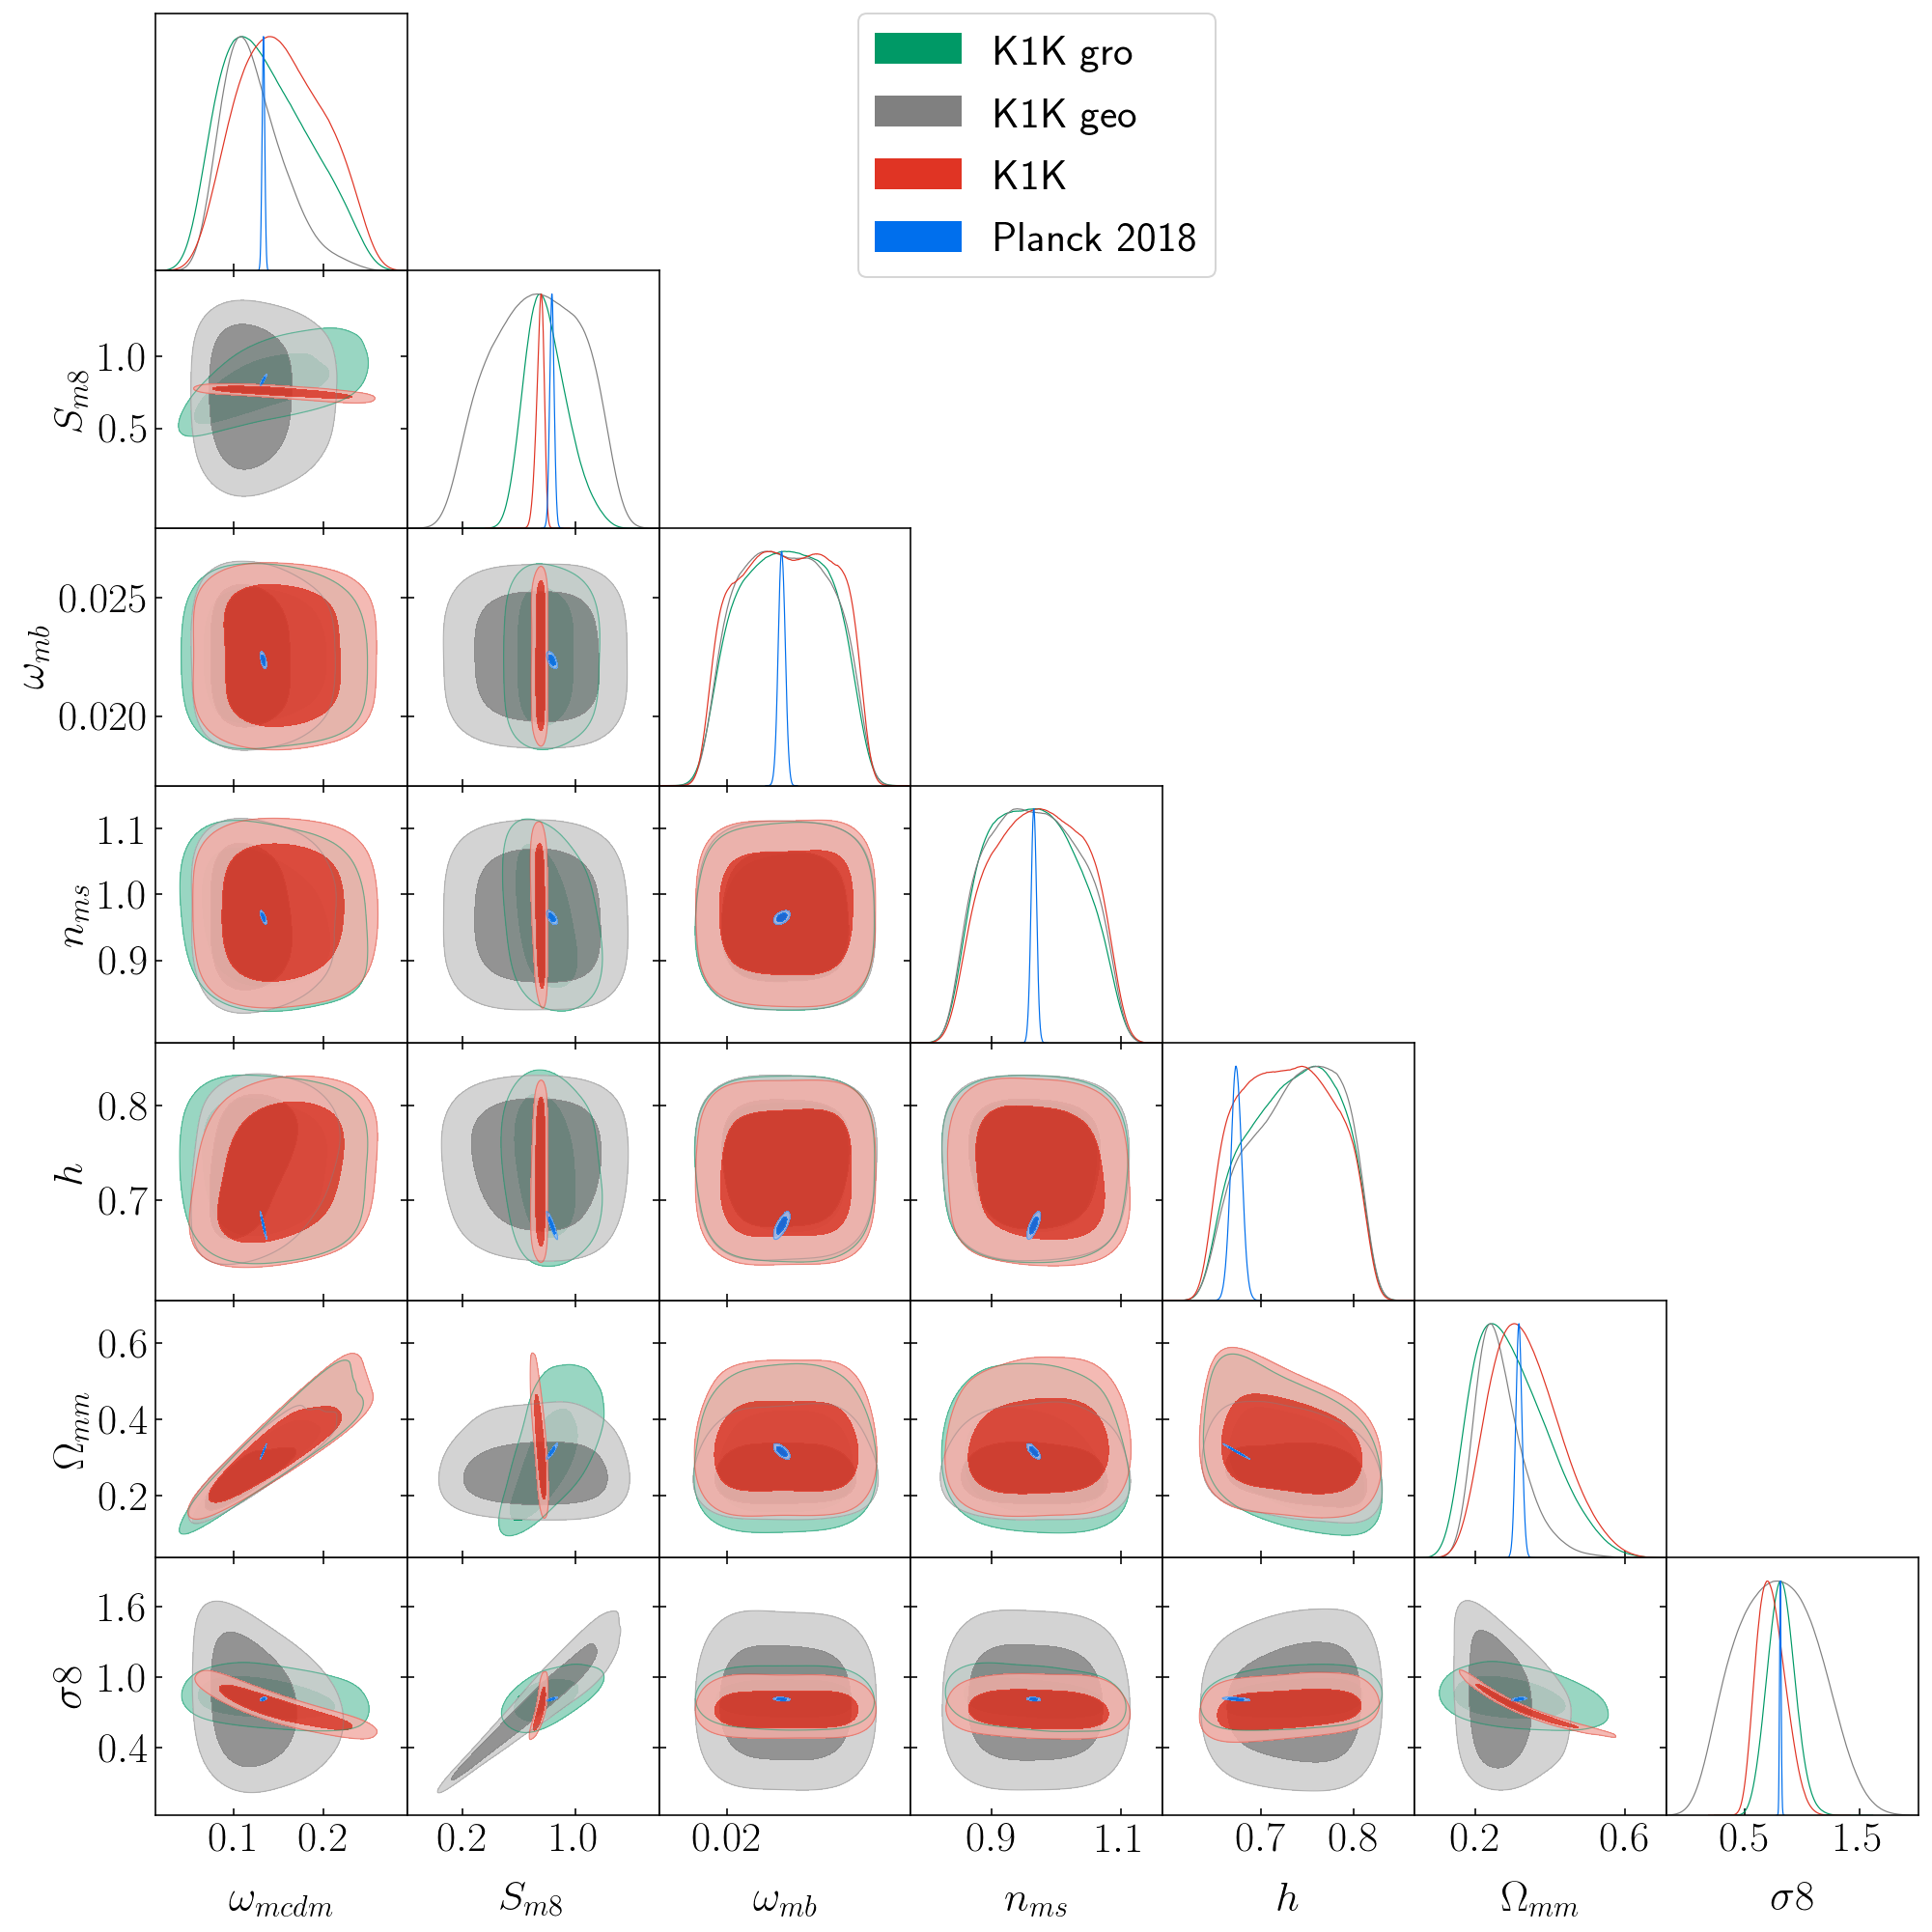

In [92]:
g = plots.getSubplotPlotter()
g.settings.axes_fontsize = 25
g.settings.legend_fontsize = 25
g.settings.axes_labelsize = 25
g.triangle_plot([K1K_gro, K1K_geo, K1K, planck], filled=True)
#[ 'ln10^10A_s', 'n_s', 'h',  'Omega_m', 'sigma8', 'S8'],

In [ ]:
g = plots.getSubplotPlotter()
g.settings.axes_fontsize = 25
g.settings.legend_fontsize = 25
g.settings.axes_labelsize = 25
g.triangle_plot([KV_mark3_geo_getdist, KV_n_geo_getdist],
                 filled=True)
#[ 'ln10^10A_s', 'n_s', 'h',  'Omega_m', 'sigma8', 'S8'],

In [ ]:
g.plot_2d([KV_mark3_gro_getdist, KV_mark3_geo_getdist, KV_getdist, planck_getdist], 'Omega_m', 'sigma8', filled=True, lims=[0.05, 0.8, 0.5, 1.8])
g.add_legend(['KV450 Gro', 'KV450 Geo', 'KV450', 'P.18'], legend_loc='upper right');

In [ ]:
g.plot_2d([KV_mark3_gro_getdist, KV_mark3_geo_getdist, KV_getdist, planck_getdist],  'sigma8', 'S8', filled=True, lims=[0.4, 1.3, 0.5, 1.22])
g.add_legend(['KV450 Gro', 'KV450 Geo', 'KV450', 'P.18'], legend_loc='upper left');